In [1]:
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print("Train Data Length :",len(x_train))
print("==================================================")
print("Test Data Length :",len(x_test))

Train Data Length : 60000
Test Data Length : 10000


In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

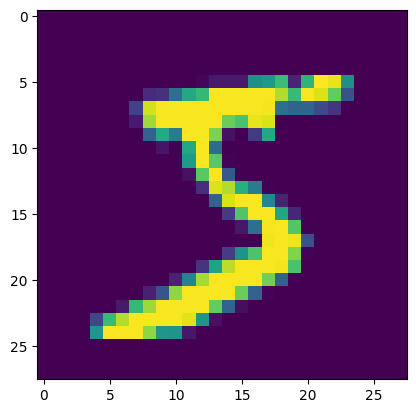

In [6]:
plt.imshow(x_train[0])
plt.show()

In [7]:
y_train[0]

5

In [8]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [9]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


# Visualize Data From Train Data

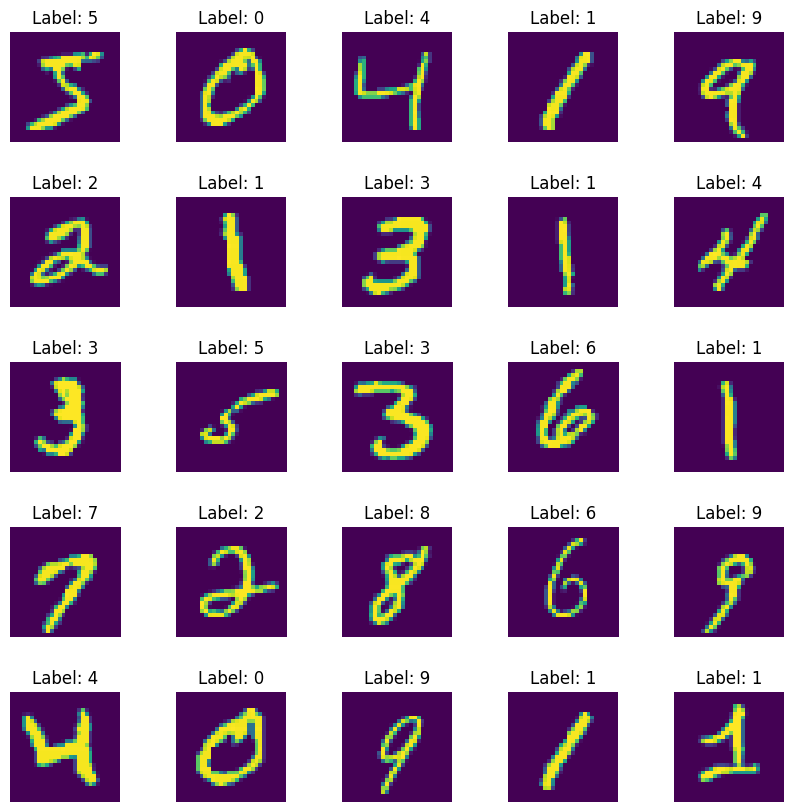

In [10]:
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
axes = axes.ravel()
for i in range(25):
    # Display the i-th image
    axes[i].imshow(x_train[i])
    axes[i].set_title(f'Label: {y_train[i]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


# Visualize Data From Test Data

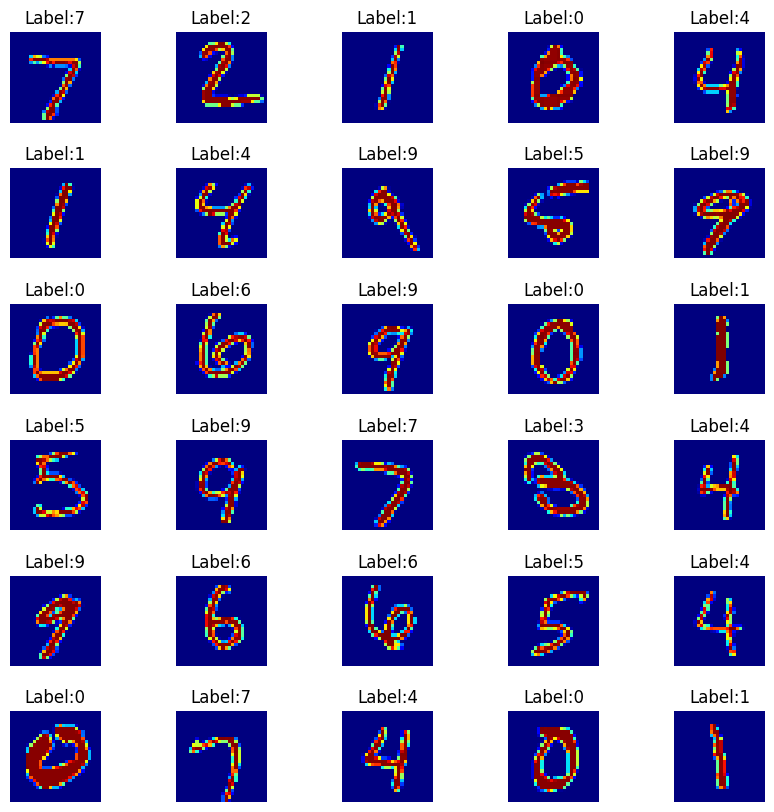

In [11]:
fig,ax=plt.subplots(6,5,figsize=(10,10))
ax=ax.ravel()
for i in range(30):
    ax[i].imshow(x_test[i],cmap="jet")
    ax[i].set_title(f"Label:{y_test[i]}")
    ax[i].axis("off")
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

# Preprocessing the input data

In [12]:
num_train=x_train.shape[0]
num_test=x_test.shape[0]
img_height=28
img_width=28
x_train=x_train.reshape(num_train,img_height,img_width)
x_test=x_test.reshape(num_test,img_height,img_width)
input_shape=(img_height,img_width,1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

# Converting the class vectors to binary class

In [13]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Defining the model architecture

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001  
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [16]:
history=model.fit(x_train, y_train,batch_size=64,epochs=15,verbose=1,validation_data=(x_test, y_test))

Epoch 1/15


2023-10-12 12:39:00.980481: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


938/938 [==============================] - 7s 5ms/step - loss: 0.2504 - accuracy: 0.9247 - val_loss: 0.0776 - val_accuracy: 0.9780
Epoch 2/15
938/938 [==============================] - 5s 5ms/step - loss: 0.1178 - accuracy: 0.9656 - val_loss: 0.0519 - val_accuracy: 0.9848
Epoch 3/15
938/938 [==============================] - 5s 5ms/step - loss: 0.1000 - accuracy: 0.9708 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 4/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0924 - accuracy: 0.9735 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 5/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0915 - accuracy: 0.9744 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 6/15
938/938 [==============================] - 5s 5ms/step - loss: 0.0862 - accuracy: 0.9760 - val_loss: 0.0512 - val_accuracy: 0.9869
Epoch 7/15
938/938 [==============================] - 4s 5ms/step - loss: 0.0869 - accuracy: 0.9761 - val_loss: 0.0597 - val_accuracy: 0.9869
Epoch 8/15
938/93

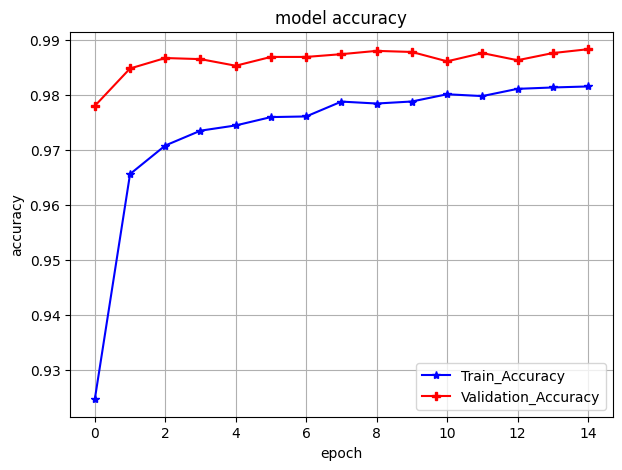

In [17]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

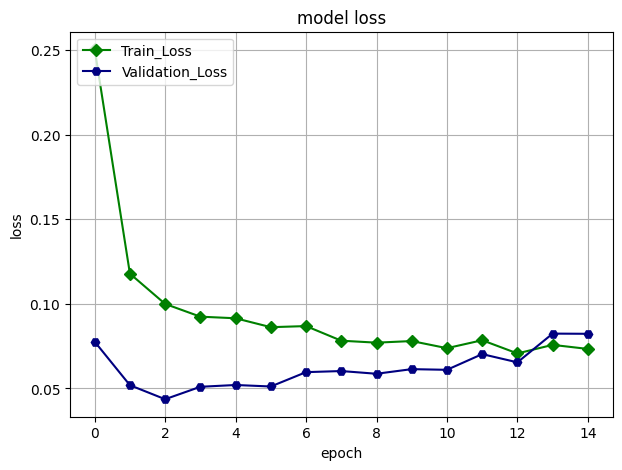

In [18]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

In [19]:
y_pred = model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)


313/313 [==============================] - 1s 1ms/step


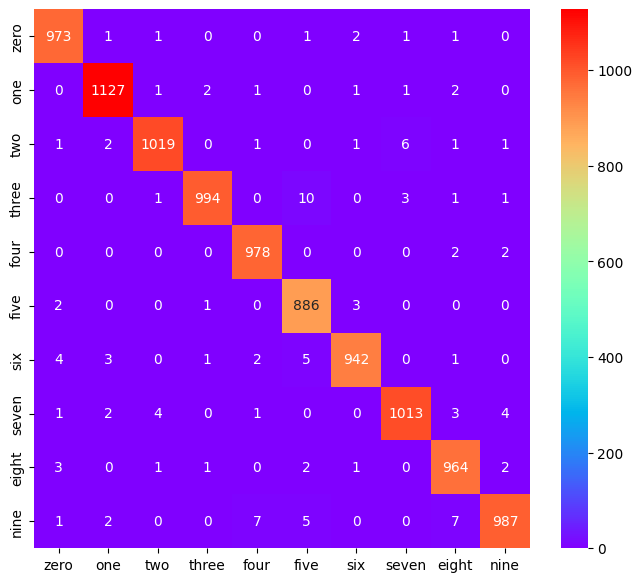

In [20]:
import seaborn as sns
lab=["zero","one","two","three","four","five","six","seven","eight","nine"]
plt.figure(figsize=(8,7))
cf=confusion_matrix(y_true, y_pred)
sns.heatmap(cf,annot=True,fmt="d",cmap="rainbow",xticklabels=lab,yticklabels=lab)
plt.show()

In [21]:
print(classification_report(y_true,y_pred,target_names=lab))

              precision    recall  f1-score   support

        zero       0.99      0.99      0.99       980
         one       0.99      0.99      0.99      1135
         two       0.99      0.99      0.99      1032
       three       0.99      0.98      0.99      1010
        four       0.99      1.00      0.99       982
        five       0.97      0.99      0.98       892
         six       0.99      0.98      0.99       958
       seven       0.99      0.99      0.99      1028
       eight       0.98      0.99      0.99       974
        nine       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



313/313 [==============================] - 0s 1ms/step


<Figure size 1000x700 with 0 Axes>

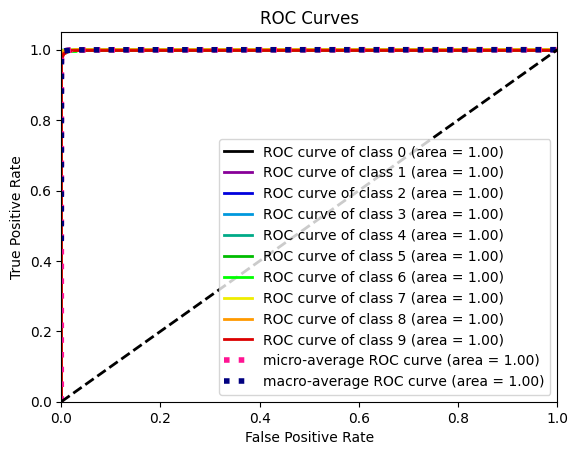

In [22]:
pred=model.predict(x_test)
import scikitplot as skplt
plt.figure(figsize=(10,7))
skplt.metrics.plot_roc(y_true, pred)
plt.show()

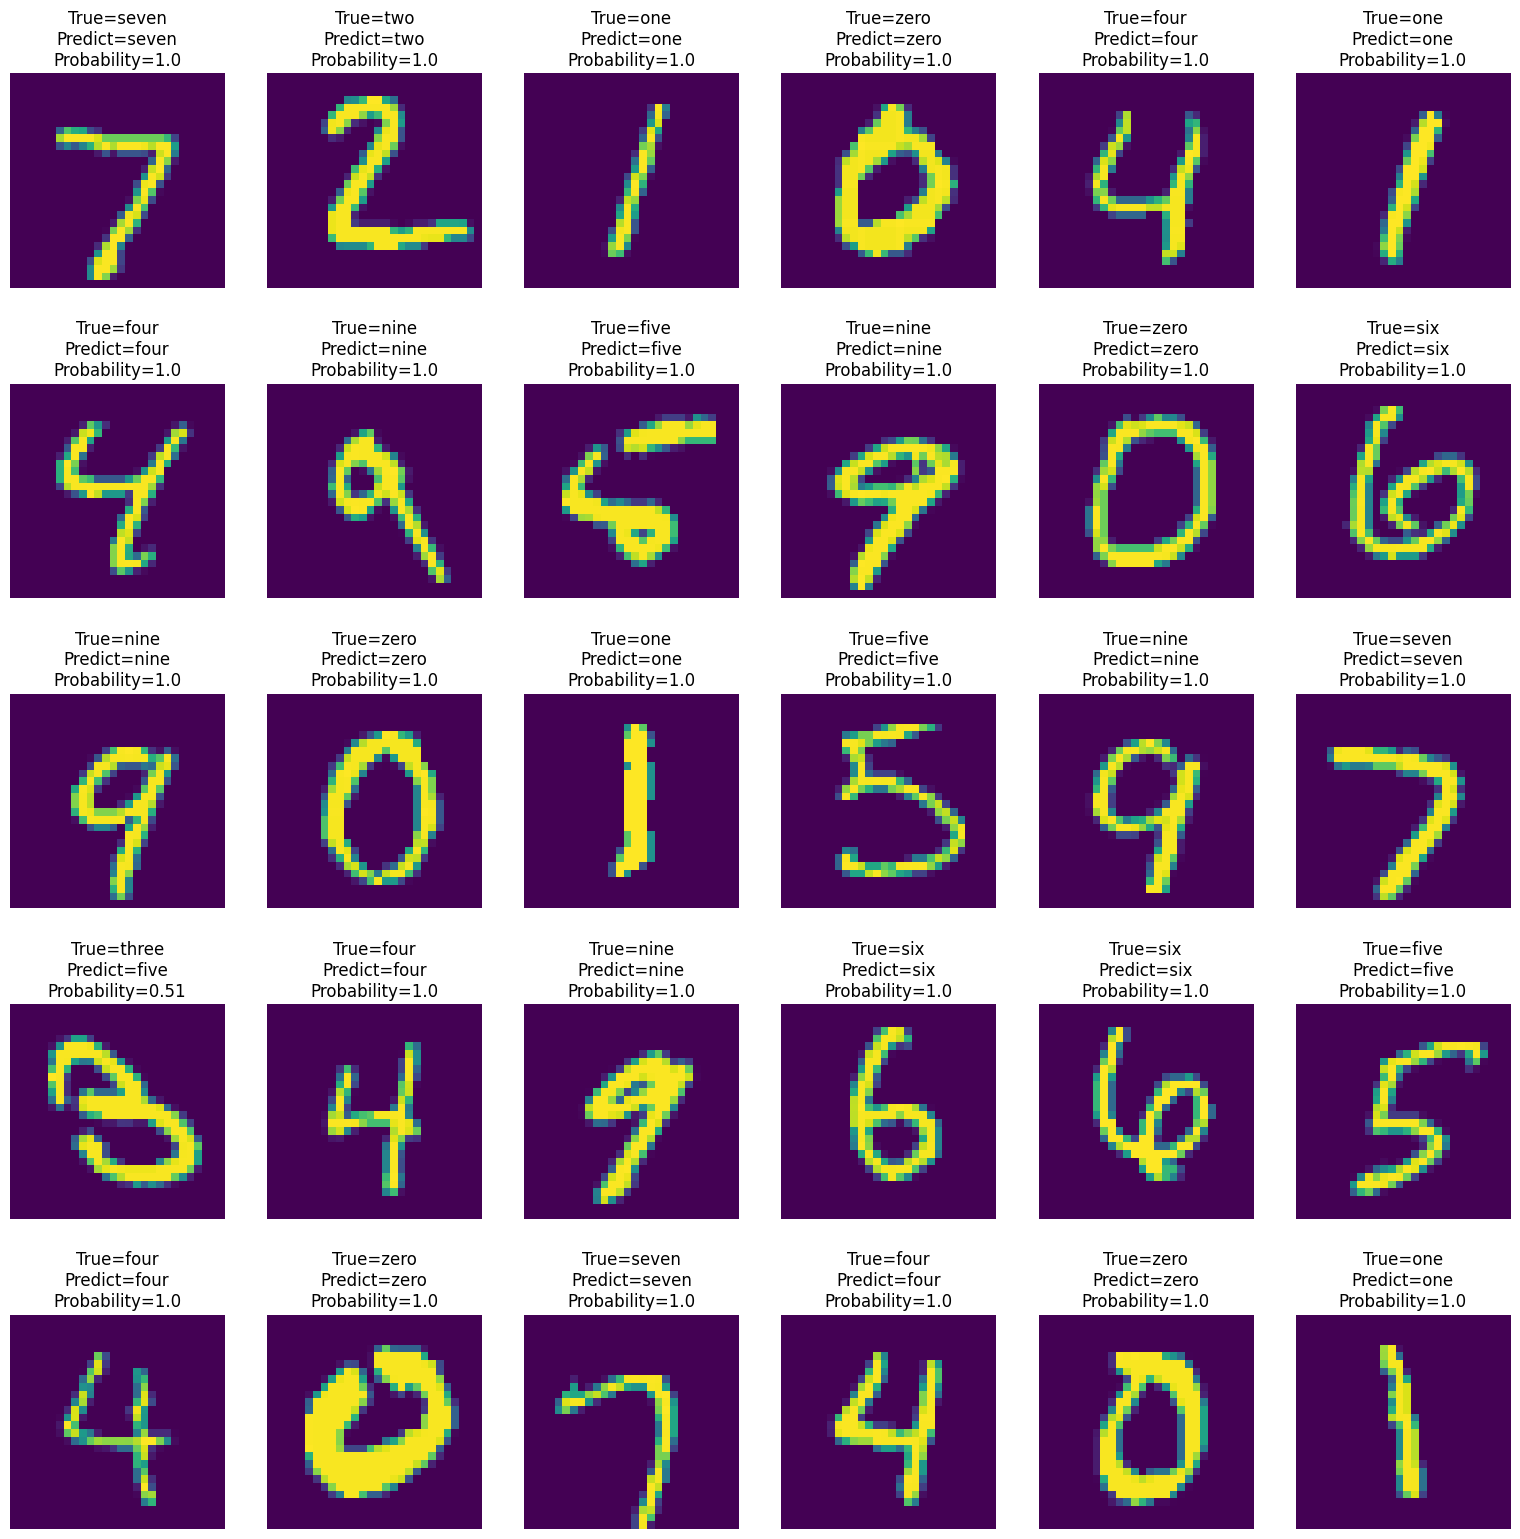

In [23]:


row = 5
column = 6

fig, ax = plt.subplots(row, column)
fig.set_size_inches(15, 15)

index = 0
for m in range(0, row):
    for n in range(0, column):
        true_data = np.argmax(y_test[index])  # Get the true class label
        pred_data = y_pred[index]  # Get the predicted class label
        probability = round(pred[index][pred_data], 2)
        ax[m][n].axis("off")
        ax[m][n].set_title("True=" + str(lab[true_data]) + "\nPredict=" + str(lab[pred_data]) + "\nProbability=" + str(probability))
        ax[m][n].imshow(x_test[index])
        index += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)
plt.show()


1/1 [==============================] - 0s 86ms/step


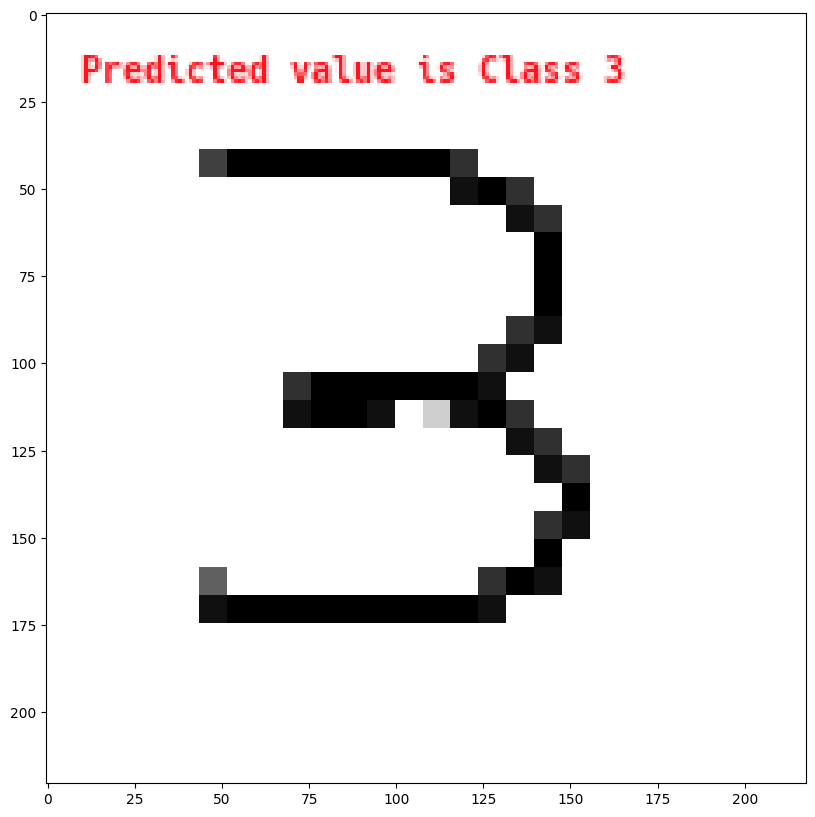

In [24]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import numpy as np

results = { 0: 'Class 0', 1: 'Class 1', 2: 'Class 2', 3: 'Class 3', 4: 'Class 4', 5: 'Class 5', 6: 'Class 6', 7: 'Class 7', 8: 'Class 8',
    9: 'Class 9'}


response = requests.get("https://www.neuralnine.com/wp-content/uploads/2019/09/3.png")
image_path = Image.open(BytesIO(response.content))
image_size = (28, 28)
image_resize = image_path.resize(image_size).convert('L')  # 'L' mode converts to grayscale
image_array = np.array(image_resize)
image_scale = image_array.astype("float32") / 255.0
image_reshape = image_scale.reshape(1, 28, 28, 1)  
final_pred = model.predict(image_reshape)[0]
max_prob = np.argmax(final_pred, axis=0)
my_predict = results[max_prob]
myFont = ImageFont.truetype('/kaggle/input/hack-font/Hack-Bold.ttf', 10)
image_draw = ImageDraw.Draw(image_path)
image_draw.text((10,10), f"Predicted value is {my_predict}", font=myFont, fill=(255, 20, 30))
image_path.save("my_image.png")
my_image = Image.open("my_image.png")
plt.figure(figsize=(10, 10))
plt.imshow(my_image)
plt.show()
